In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
import matplotlib as mpl


In [2]:
df = pd.read_csv("data.csv")

Basic Properties

In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop("Unnamed: 32", axis = 1, inplace = True)

In [6]:
X = df.iloc[:,:]
y = df.iloc[:,1]

In [7]:
X = X.drop(['diagnosis', 'id'], axis = 1)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [10]:
#Visualisation

mpl.style.use(['ggplot'])

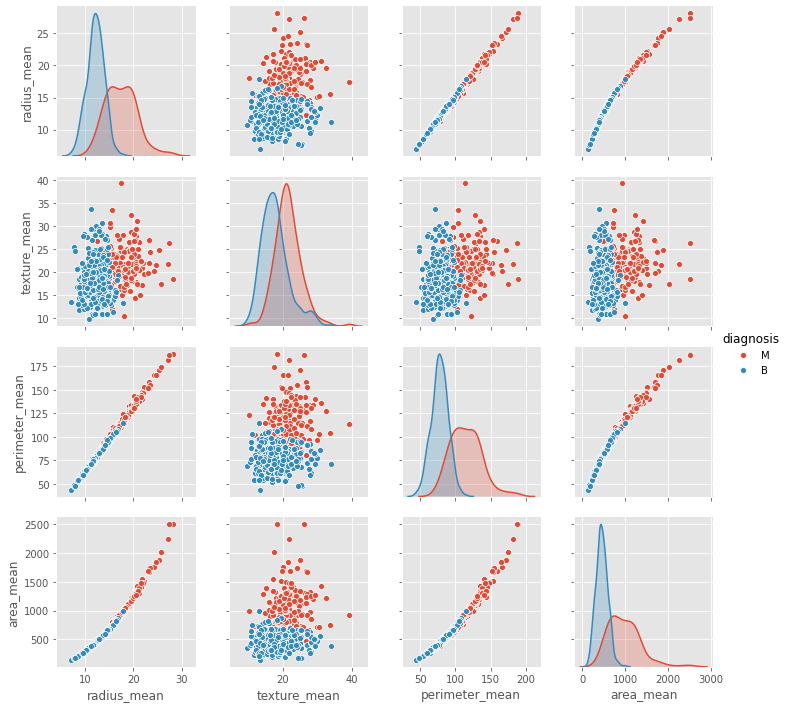

In [11]:
sns.pairplot(df.loc[:, 'diagnosis': 'area_mean'], hue="diagnosis")

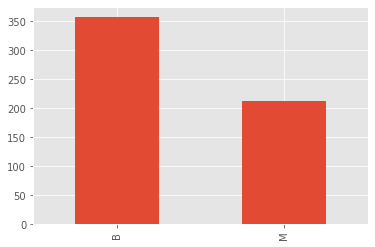

In [12]:
y.value_counts().plot(kind = "bar")

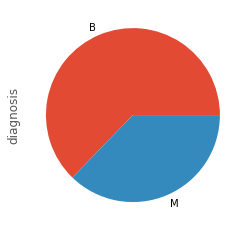

In [13]:
y.value_counts().plot(kind = "pie")

In [17]:
new_data_B = df[df.diagnosis != "M"]
new_data_M = df[df.diagnosis != "B"]

#Following gr

FOLLOWNG GRAPHS SHOW THE DIFFERENCE BETWEEN VARIOUS PARAMTERS OF BENIGN AND MALIGNANT TUMORS

Text(0, 0.5, ' mean concavity for benigm')

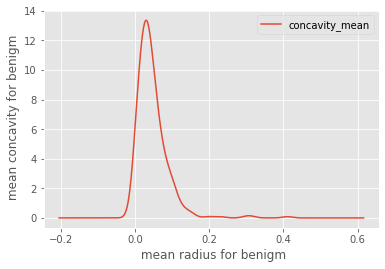

In [20]:
new_data_B.plot(kind = 'density', x = "radius_mean", y = 'concavity_mean')
plt.xlabel(" mean radius for benigm")
plt.ylabel(" mean concavity for benigm")

Text(0, 0.5, ' mean concavity for malignant')

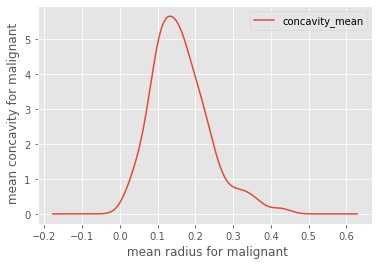

In [21]:
new_data_M.plot(kind = 'density', x = "radius_mean", y = 'concavity_mean')
plt.xlabel(" mean radius for malignant")
plt.ylabel(" mean concavity for malignant")

Text(0, 0.5, ' mean area for benigm')

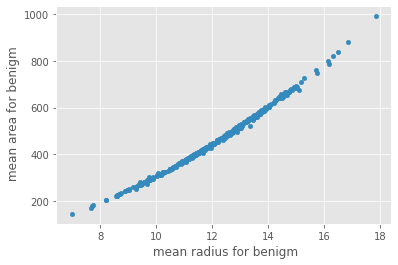

In [22]:
new_data_B.plot(kind = 'scatter', x = "radius_mean", y = 'area_mean')
plt.xlabel(" mean radius for benigm")
plt.ylabel(" mean area for benigm")

Text(0, 0.5, ' mean area for malignant')

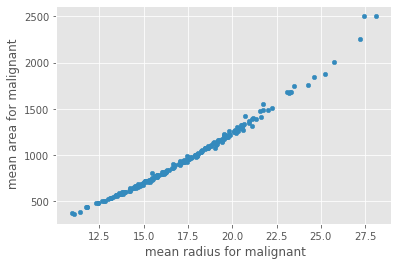

In [25]:
new_data_M.plot(kind = 'scatter', x = "radius_mean", y = 'area_mean')
plt.xlabel(" mean radius for malignant")
plt.ylabel(" mean area for malignant")

This prove that M Tumors are much bigger than B tumors

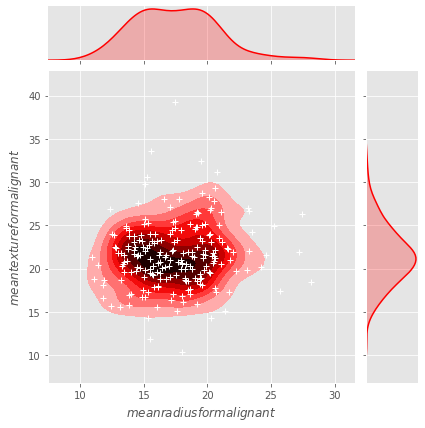

In [31]:
g = sns.jointplot(x=new_data_M['radius_mean'], y=new_data_M['texture_mean'], data=new_data_M, kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$mean radius for malignant$", "$mean texture for malignant$");

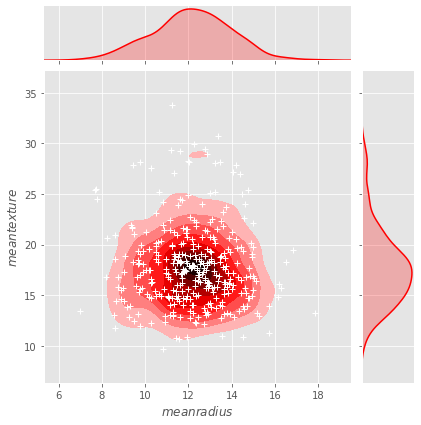

In [32]:
g = sns.jointplot(x=new_data_B['radius_mean'], y=new_data_B['texture_mean'], data=new_data_B, kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$mean radius$", "$mean texture$");

In [33]:
avgB = {}
for i in range(2, new_data_B.shape[1]):
    m = np.mean(new_data_B.iloc[:,i])
    avgB.update({new_data_B.columns[i]:m})
    
avgB_df = pd.DataFrame(avgB, index = np.arange(1, 31))
avgB_df = avgB_df.transpose()
avgB_df = avgB_df.iloc[:, :1]

In [34]:
avgM = {}
for i in range(2, new_data_M.shape[1]):
    m = np.mean(new_data_M.iloc[:,i])
    avgM.update({new_data_M.columns[i]:m})
    
avgM_df = pd.DataFrame(avgM, index = np.arange(1, 31))
avgM_df = avgM_df.transpose()
avgM_df = avgM_df.iloc[:, :1]

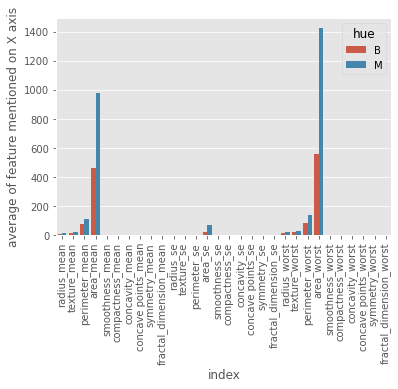

In [35]:
avgB_df["hue"] = 'B'
avgM_df["hue"] = 'M'
res = pd.concat([avgB_df, avgM_df])
res = res.reset_index(level = 0)
sns.barplot(x = res.iloc[:,0], y = res.iloc[:,1], data = res, hue="hue")
plt.xticks(rotation=90)
plt.ylabel('average of feature mentioned on X axis')
plt.show()

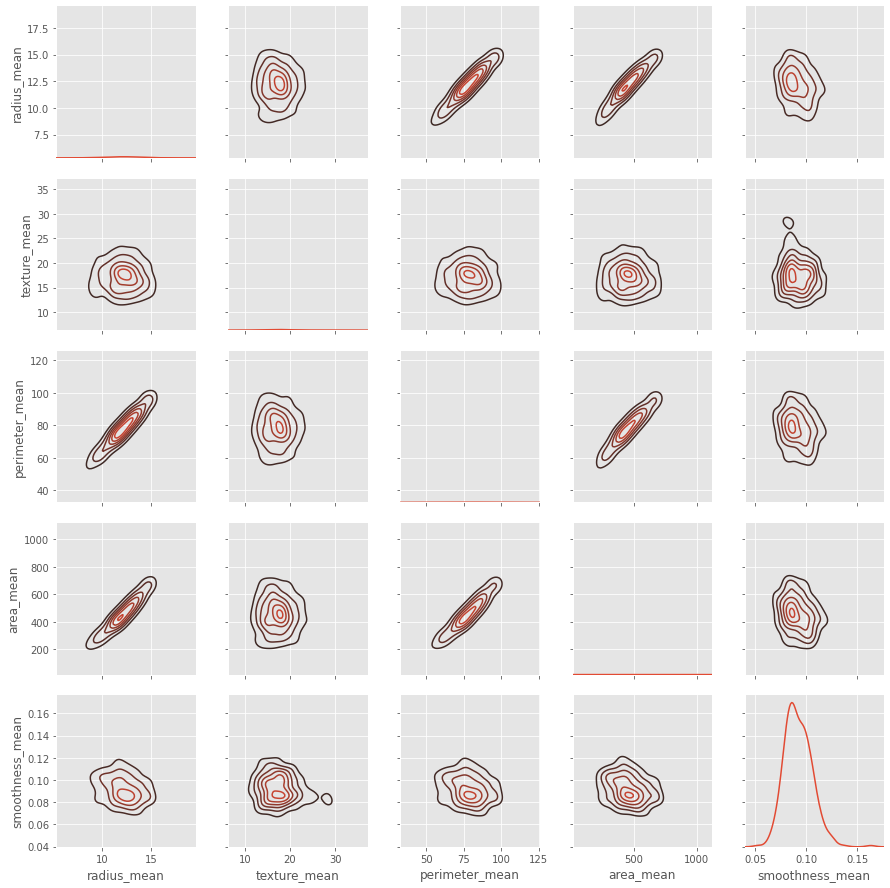

In [36]:
g = sns.PairGrid(new_data_B.loc[:, 'radius_mean':'smoothness_mean'])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

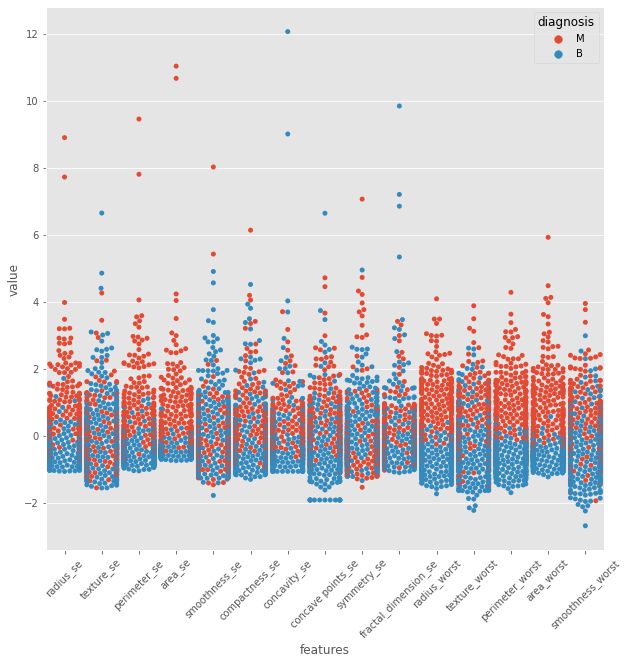

In [37]:
data = pd.DataFrame(X)
data_n_2 = (data - data.mean())/(data.std())
data = pd.concat([y,data_n_2.iloc[:, 10:25]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
                      var_name="features",
                      value_name="value")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45)

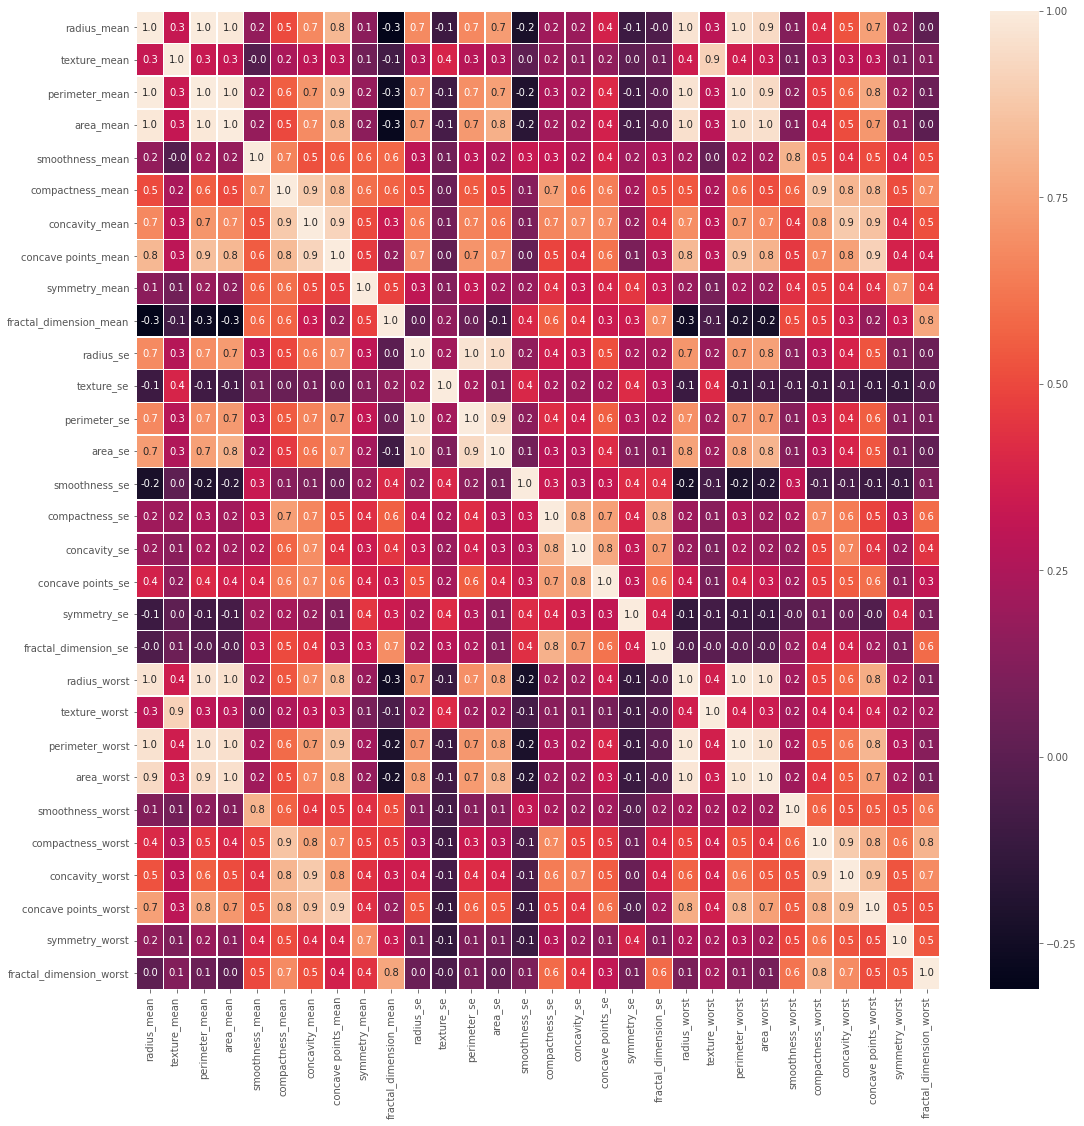

In [38]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);


In [39]:
B,M = y.value_counts()
print(B,M)

357 212


In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 1)

Fitting and Testing the Classification models

In [41]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
prediction=model.predict(xtest)
print(metrics.accuracy_score(prediction, ytest))

0.956140350877193


In [42]:
    
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data

metrics.accuracy_score(prediction,ytest)
print(metrics.accuracy_score(prediction,ytest))
metrics.confusion_matrix(ytest,prediction)


0.631578947368421


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[72,  0],
       [42,  0]], dtype=int64)

In [43]:
#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(metrics.accuracy_score(ypred,ytest))
metrics.confusion_matrix(ytest,prediction)


0.9385964912280702


array([[72,  0],
       [42,  0]], dtype=int64)

In [44]:
#decision tree

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(metrics.accuracy_score(ypred,ytest))
metrics.confusion_matrix(ytest,prediction)

0.9473684210526315


array([[72,  0],
       [42,  0]], dtype=int64)

In [45]:
#decision tree

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred,ytest))

#random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print('FORSEST TREE CLASSIFICATION:: ',metrics.accuracy_score(prediction,ytest))


#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred,ytest))


#naive bayes
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypred = NB.predict(xtest)
print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred,ytest))

DECISION TREE CLASSIFIER::  0.9473684210526315
FORSEST TREE CLASSIFICATION::  0.956140350877193
SUPPORT VECTOR MACHINE::  0.631578947368421
K NEAREST NEIGHBOURS::  0.9385964912280702
NAIVE BAYES ALGORITHM::  0.9473684210526315


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


After Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [47]:
#lets split the data now
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 1)

#decision tree
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred,ytest))

#random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print('FORSEST TREE CLASSIFICATION:: ',metrics.accuracy_score(prediction,ytest))


#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred,ytest))


#naive bayes
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypred = NB.predict(xtest)
print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred,ytest))

DECISION TREE CLASSIFIER::  0.956140350877193
FORSEST TREE CLASSIFICATION::  0.956140350877193
SUPPORT VECTOR MACHINE::  0.9736842105263158
K NEAREST NEIGHBOURS::  0.956140350877193
NAIVE BAYES ALGORITHM::  0.9473684210526315


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


After Scaling SVM 